### Problem 3: $\sin\left(x^{2}\right)$ ###

Using the Monte Carlo's method, we will evaluate the following integral: 

$$\int_{0}^{x_{0}}\sin\left(x^{2}\right)dx$$

Max value of the curve: 0.999970251594319.
Min value of the curve: -0.9999092765436705.


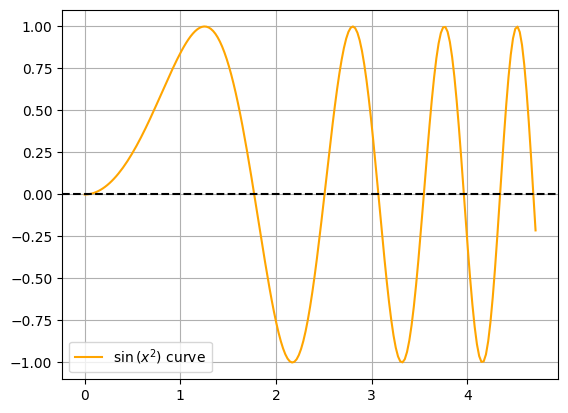

In [105]:
# First: Defining the parameters and visualizating the curve

import numpy as np
import matplotlib.pyplot as plt

d = 201 # Number of points in the x-axis discretization
n = 4500 # Number os points in the Monte Carlo's method
x0 = 1.5*np.pi

def random_points(x_min,x_max,y_min,y_max, numer_of_points, n_discretization = 101): # Function to generate random points
    x_coordenates = []
    y_coordenates = []
    x_function_interval = np.linspace(x_min, x_max, n_discretization)
    for i in range(0,numer_of_points,1):
        x = np.random.choice(x_function_interval)
        y = np.random.uniform(y_min,y_max)
        x_coordenates.append(x)
        y_coordenates.append(y)
    return (np.array(x_coordenates), np.array(y_coordenates))

def f(x): # Integrated function
    x2 = np.power(x,2)
    return np.sin(x2)

x_interval = np.linspace(0,x0,d)
function_curve = f(x_interval)

max_curve_value = np.max(function_curve)
min_curve_value = np.min(function_curve)

plt.plot(x_interval, function_curve, color = 'orange', label = r'$\sin\left(x^{2}\right)$ curve')
plt.grid(True)
plt.legend(loc = 'best')
plt.ylim(1.1*min_curve_value,1.1*max_curve_value)
plt.axhline(0, color = 'black', linestyle = '--')
print(f'Max value of the curve: {max_curve_value}.')
print(f'Min value of the curve: {min_curve_value}.')
plt.show()

Red - Points inside the positive area (number: 838).
Green - Points inside the negative area (number: 495).
Blue - Points outside the area (number: 3167).

Approximate area by Monte Carlo's method: 0.7183342479821282 a.u. (number of points: 4500).


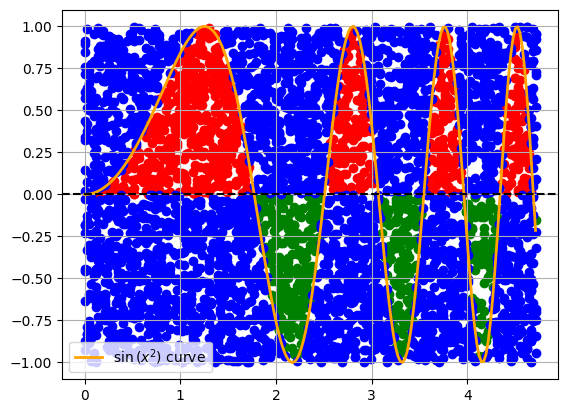

In [106]:
# Applying Monte Carlo's method

x_coordenates, y_coordenates = random_points(x_interval[0],x_interval[-1],min_curve_value,max_curve_value,n, d)

n_inside_positive = 0
n_inside_negative = 0
n_outside = 0

x_inside_positive = []
y_inside_positive = []
x_inside_negative = []
y_inside_negative = []
x_outside = []
y_outside = []

for i in range(0,n, 1):
    x_i = np.where(x_interval == x_coordenates[i])[0][0]
    if (function_curve[x_i] >= 0) and (y_coordenates[i] < function_curve[x_i]) and (y_coordenates[i] >= 0):
        x_inside_positive.append(x_coordenates[i])
        y_inside_positive.append(y_coordenates[i])
        n_inside_positive += 1
    elif (function_curve[x_i] < 0) and (y_coordenates[i] > function_curve[x_i]) and (y_coordenates[i] <= 0):
        x_inside_negative.append(x_coordenates[i])
        y_inside_negative.append(y_coordenates[i])
        n_inside_negative += 1
    else:
        x_outside.append(x_coordenates[i])
        y_outside.append(y_coordenates[i])
        n_outside += 1

# Calculating the approximate area and ploting the graph:

A_know = (x_interval[-1]-x_interval[0]) * (max_curve_value - min_curve_value)
A = A_know * (n_inside_positive - n_inside_negative)/n # n = n_inside_positive + n_inside_negative + n_outside

x_inside_positive = np.array(x_inside_positive)
x_inside_negative = np.array(x_inside_negative)
x_outside = np.array(x_outside)
y_inside_positive = np.array(y_inside_positive)
y_inside_negative = np.array(y_inside_negative)
y_outside = np.array(y_outside)

plt.plot(x_interval, function_curve, label = r'$\sin\left(x^{2}\right)$ curve', color = 'orange', linewidth = 2)
plt.scatter(x_inside_positive, y_inside_positive, color = 'red')
plt.scatter(x_inside_negative, y_inside_negative, color = 'green')
plt.scatter(x_outside, y_outside, color = 'blue')
plt.grid(True)
plt.legend(loc = 'best')
plt.ylim(1.1*min_curve_value,1.1*max_curve_value)
plt.axhline(0, color = 'black', linestyle = '--')
print(f'\033[31mRed - Points inside the positive area (number: {n_inside_positive}).')
print(f'\033[32mGreen - Points inside the negative area (number: {n_inside_negative}).')
print(f'\033[34mBlue - Points outside the area (number: {n_outside}).\033[0m')
print(f"\n\033[1mApproximate area by Monte Carlo's method: {A} a.u. (number of points: {n}).\033[0m")
plt.show()